A Lightweight Federated Learning model for IoT Botnet Attack Detection (N-BaIoT Dataset)

1. Data Preprocessing

A. Feature Selection
1. Extreme Gradient Boosting (XGBoost) for Feature Selection
2. Grid Search for XGBoost hyperparameter tunning
3. Repeated Stratified K-fold Cross Validation for XGBoost Training
4. 25 features selected based on Feature Importance

(25 features are selected so as to reduce the input layer & complexity of the Deep Neural Network to be used for classification)

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import os

In [16]:
#benign_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.benign.csv')
#mirai_scan_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.mirai.scan.csv')
#mirai_syn_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.mirai.syn.csv')
#mirai_ack_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.mirai.ack.csv')
#mirai_udp_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.mirai.udp.csv')
#mirai_udpplain_1 = pd.read_csv('C:/Users/Lambert/Downloads/1.mirai.udpplain.csv')

In [15]:
#benign_1['label'] = 'benign'
#mirai_scan_1['label'] = 'mirai_scan'
#mirai_syn_1['label'] = 'mirai_syn'
#mirai_ack_1['label'] = 'mirai_ack'
#mirai_udp_1['label'] = 'mirai_udp'
#mirai_udpplain_1 ['label'] = 'mirai_udpplain'


In [14]:
#data_prep = pd.concat([benign_1, mirai_scan_1, mirai_syn_1,
  #               axis=0, sort=False, ignore_index=True)

In [13]:
#data_prep.shape

In [7]:
#data_prep.isnull().sum().sum()

0

In [11]:
#data_prep.duplicated().sum()

In [12]:
# Remove duplicate rows from the DataFrame
#data_prep = data_prep.drop_duplicates()

#data_prep.duplicated().sum()

In [ ]:
data_prep = data_prep.sample(frac=1).reset_index(drop=True)

In [13]:
data_prep.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,102.373809,483.763156,2.976311e+04,186.180502,442.506462,42644.622465,620.368034,400.903169,52186.197070,6426.707091,...,0.000000e+00,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_udp
1,1.000016,60.000676,2.839438e-02,1.002561,60.107169,4.485015,1.429660,72.535112,366.029570,6.180915,...,2.300000e-31,0.0,7.307121,60.0,9.540000e-07,84.852814,2.030000e-12,-4.970000e-29,-3.860000e-17,benign
2,146.134991,335.092604,6.352091e+04,223.064029,371.120033,60630.979269,633.964255,391.109782,57906.285013,6278.024018,...,0.000000e+00,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_ack
3,181.348703,66.134855,4.825152e+01,269.431380,67.017045,48.999709,713.174778,68.510604,46.720392,6729.554663,...,0.000000e+00,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_syn
4,123.839934,60.000000,3.511104e-08,144.282895,60.000002,0.000093,282.286236,60.003099,0.147381,2321.807804,...,0.000000e+00,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_scan


In [14]:
import numpy as np

# Select columns for z-score calculation (excluding the last column)
z_normalized_columns = data_prep.iloc[:, :-1]

# Calculate z-scores for each column
z_scores = (z_normalized_columns - z_normalized_columns.mean()) / z_normalized_columns.std()

# Set a threshold for z-score beyond which a data point is considered an outlier
z_score_threshold = 3  # Adjust this threshold as needed

# Identify rows where any z-score exceeds the threshold
outlier_mask = (np.abs(z_scores) > z_score_threshold).any(axis=1)

# Remove outliers from the dataset
data_prep_filtered = data_prep[~outlier_mask]

In [16]:
features = list(data_prep_filtered.columns)
features.remove("label")
#features

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_prep_filtered[features] = scaler.fit_transform(data_prep_filtered[features])

C:\Users\Lambert\AppData\Local\Temp\ipykernel_13512\1734918417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep_filtered[features] = scaler.fit_transform(data_prep_filtered[features])


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

data_prep_filtered['label'] = label_encoder.fit_transform(data_prep_filtered['label'])

C:\Users\Lambert\AppData\Local\Temp\ipykernel_13512\514371823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep_filtered['label'] = label_encoder.fit_transform(data_prep_filtered['label'])


In [19]:
data_prep_filtered.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,0.403350,8.374766e-01,4.649833e-01,0.509239,7.559416e-01,6.662285e-01,0.652086,0.673722,0.819020,0.922213,...,5.470000e-29,2.660000e-17,0.0,9.762846e-01,0.0,9.762846e-01,0.0,2.348783e-24,5.425461e-14,4
2,0.577468,5.436613e-01,9.923747e-01,0.610668,6.148617e-01,9.472258e-01,0.666400,0.654367,0.908792,0.900874,...,5.470000e-29,2.660000e-17,0.0,1.387779e-17,0.0,1.387779e-17,0.0,2.348783e-24,5.425461e-14,1
3,0.717578,1.212422e-02,7.538240e-04,0.738176,1.386768e-02,7.655128e-04,0.749795,0.016819,0.000733,0.965677,...,5.470000e-29,2.660000e-17,0.0,2.766798e-02,0.0,2.766798e-02,0.0,2.348783e-24,5.425461e-14,3
4,0.488760,1.445760e-12,5.485329e-13,0.394022,3.831635e-09,1.453890e-09,0.296145,0.000006,0.000002,0.333081,...,5.470000e-29,2.660000e-17,0.0,1.387779e-17,0.0,1.387779e-17,0.0,2.348783e-24,5.425461e-14,2
5,0.678766,8.327413e-03,6.447529e-04,0.719947,1.159594e-02,7.487616e-04,0.741946,0.015933,0.000763,0.964718,...,5.470000e-29,2.660000e-17,0.0,1.387779e-17,0.0,1.387779e-17,0.0,2.348783e-24,5.425461e-14,3


In [20]:
y=data_prep_filtered['label']
X=data_prep_filtered.drop(columns='label')

In [21]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

xgb = XGBClassifier(
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective='multi:softmax',
 num_class=6,
 nthread=4,
 seed=42)

parameters = {
    'max_depth': [6, 10],
    'n_estimators': range(300, 500, 800),
    'learning_rate': [0.1, 0.01, 0.05],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring='accuracy', 
    cv=rskf,

    verbose=2)

grid_search.fit(X, y)

best_params = grid_search.best_params_
print(best_params)

Fitting 9 folds for each of 24 candidates, totalling 216 fits
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 3.8min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 4.0min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 3.7min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 3.9min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 5.5min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 6.4min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 5.2min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.1, reg_lambda=0.1; total time= 5.1min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alp

In [26]:
xgb_model = XGBClassifier(
 learning_rate = 0.1, 
 max_depth = 6, 
 n_estimators = 300,
 reg_alpha = 0.1,
 reg_lambda = 0.1,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective='multi:softmax',
 num_class=6,
 nthread=4,
 seed=42)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

Mean Accuracy: 0.9999918743395868
Mean Precision: 0.9999808127579316
Mean Recall: 0.9999892335243337
Mean F1 Score: 0.9999850219367803


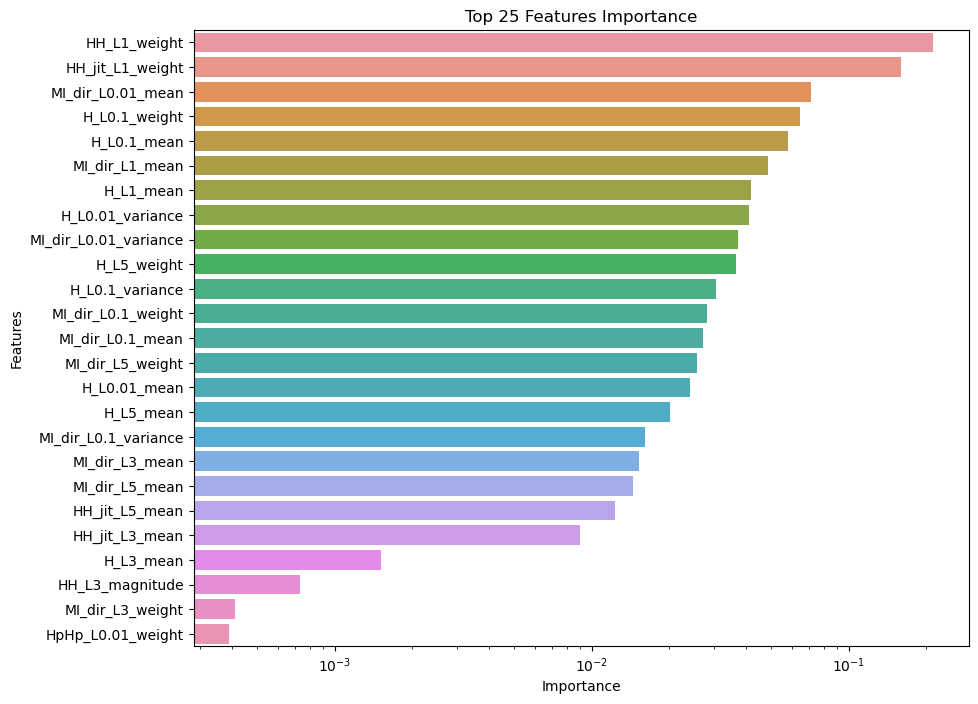

In [40]:

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialize empty arrays for feature importances and correlation matrices
all_feature_importances = []
all_correlation_matrices = []

#X = pd.DataFrame(X)

# Iterate over cross-validation splits
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  

 
    xgb_model.fit(X_train, y_train)

    # Get feature importance
    feature_importance = xgb_model.feature_importances_
    all_feature_importances.append(feature_importance)

    # Evaluate the model
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append evaluation metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Get correlation matrix
    correlation_matrix = X_train.corr()
    all_correlation_matrices.append(correlation_matrix)

# Calculate mean evaluation metrics
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1_score)

# Concatenate all feature importances and compute mean
all_feature_importances = np.array(all_feature_importances)
mean_feature_importance = np.mean(all_feature_importances, axis=0)

# Get indices of top 25 features
top_25_indices = np.argsort(mean_feature_importance)[::-1][:25]

# Get top 25 feature names
top_25_features = X.columns[top_25_indices]

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=mean_feature_importance[top_25_indices], y=top_25_features)
plt.title('Top 25 Features Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.show()

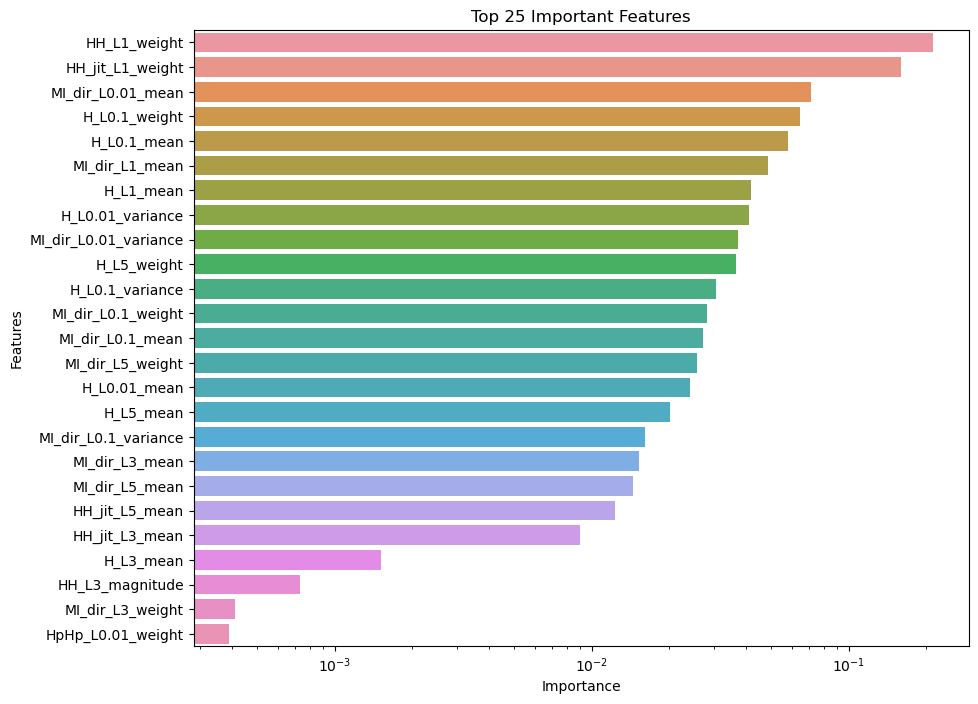

In [42]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=mean_feature_importance[top_25_indices], y=top_25_features)
plt.title('Top 25 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.show()

In [43]:
top_25_features

Index(['HH_L1_weight', 'HH_jit_L1_weight', 'MI_dir_L0.01_mean',
       'H_L0.1_weight', 'H_L0.1_mean', 'MI_dir_L1_mean', 'H_L1_mean',
       'H_L0.01_variance', 'MI_dir_L0.01_variance', 'H_L5_weight',
       'H_L0.1_variance', 'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean',
       'MI_dir_L5_weight', 'H_L0.01_mean', 'H_L5_mean', 'MI_dir_L0.1_variance',
       'MI_dir_L3_mean', 'MI_dir_L5_mean', 'HH_jit_L5_mean', 'HH_jit_L3_mean',
       'H_L3_mean', 'HH_L3_magnitude', 'MI_dir_L3_weight',
       'HpHp_L0.01_weight'],
      dtype='object')

In [18]:
#Benign
benign_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.benign.csv')
benign_2 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.benign.csv')
benign_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.benign.csv')
benign_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.benign.csv')

benign_traffic = pd.concat([benign_1, benign_2, benign_4, benign_5], ignore_index=True)

benign_traffic.shape

(300055, 115)

In [22]:
#Scan
mirai_scan_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.mirai.scan.csv')
mirai_scan_2 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.mirai.scan.csv')
mirai_scan_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.mirai.scan.csv')
mirai_scan_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.mirai.scan.csv')

mirai_scan_traffic = pd.concat([mirai_scan_1, mirai_scan_2, mirai_scan_4, mirai_scan_5], ignore_index=True)

mirai_scan_traffic.shape

(351279, 115)

In [24]:
#Syn
mirai_syn_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.mirai.syn.csv')
mirai_syn_2  = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.mirai.syn.csv')
mirai_syn_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.mirai.syn.csv')
mirai_syn_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.mirai.syn.csv')

mirai_syn_traffic = pd.concat([mirai_syn_1, mirai_syn_2, mirai_syn_4, mirai_syn_5], ignore_index=True)

mirai_syn_traffic.shape

(423254, 115)

In [26]:
#Ack
mirai_ack_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.mirai.ack.csv')
mirai_ack_2  = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.mirai.ack.csv')
mirai_ack_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.mirai.ack.csv')
mirai_ack_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.mirai.ack.csv')

mirai_ack_traffic = pd.concat([mirai_ack_1 , mirai_ack_2, mirai_ack_4, mirai_ack_5], ignore_index=True)

mirai_ack_traffic.shape

(367157, 115)

In [27]:
#Udp Flooding
mirai_udp_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.mirai.udp.csv')
mirai_udp_2 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.mirai.udp.csv')
mirai_udp_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.mirai.udp.csv')
mirai_udp_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.mirai.udp.csv')

mirai_udp_traffic = pd.concat([mirai_udp_1 , mirai_udp_2, mirai_udp_4, mirai_udp_5], ignore_index=True)

mirai_udp_traffic.shape

(762428, 115)

In [28]:
#Udp plain Flooding
mirai_udpplain_1 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/1.mirai.udpplain.csv')
mirai_udpplain_2 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/2.mirai.udpplain.csv')
mirai_udpplain_4 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/4.mirai.udpplain.csv')
mirai_udpplain_5 = pd.read_csv('C:/Users/Lambert/Desktop/nbaiot-dataset/5.mirai.udpplain.csv')

mirai_udpplain_traffic = pd.concat([mirai_udpplain_1 , mirai_udpplain_2, mirai_udpplain_4, mirai_udpplain_5], ignore_index=True)

mirai_udpplain_traffic.shape

(306839, 115)

In [29]:
benign_traffic['label'] = 'benign'
mirai_scan_traffic['label'] = 'mirai_scan'
mirai_syn_traffic['label'] = 'mirai_syn'
mirai_ack_traffic['label'] = 'mirai_ack'
mirai_udp_traffic['label'] = 'mirai_udp'
mirai_udpplain_traffic['label'] = 'mirai_udpplain'

mirai_dataset = pd.concat([benign_traffic, mirai_scan_traffic, mirai_syn_traffic,
                mirai_ack_traffic, mirai_udp_traffic, mirai_udpplain_traffic],
                axis=0, sort=False, ignore_index=True)

In [30]:
mirai_dataset.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign


In [29]:
mirai_dataset = mirai_dataset.sample(frac=1).reset_index(drop=True)
mirai_dataset.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,93.227086,504.372989,21971.599957,129.157198,466.732722,35426.084144,299.143079,387.546234,54477.460809,3752.297085,...,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000,0.000000,0.000000,mirai_udp
1,156.256198,317.983555,60888.361511,223.626453,345.239278,59546.757587,572.372953,386.497542,54689.136787,5284.394823,...,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,mirai_udpplain
2,77.476266,60.000514,0.011758,102.367803,60.005232,0.117067,233.895983,60.039775,0.793735,2034.997697,...,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,mirai_scan
3,1.000004,66.000133,0.011990,1.000740,66.028584,2.571759,1.179527,71.206241,441.547021,10.575500,...,1.301208,0.041896,17.423102,69.772629,6.786494,99.366496,70.473754,3.936551,0.079421,benign
4,5.765368,539.111316,403630.527500,10.519050,645.400791,439731.742700,22.770660,684.514351,446532.486900,43.846463,...,22536.062650,0.498546,9.973369,102.893761,74.772870,938.974817,367316.178600,23877.880950,0.526935,benign


In [31]:
selected_features = ['HH_L1_weight', 'HH_jit_L1_weight', 'MI_dir_L0.01_mean',
       'H_L0.1_weight', 'H_L0.1_mean', 'MI_dir_L1_mean', 'H_L1_mean',
       'H_L0.01_variance', 'MI_dir_L0.01_variance', 'H_L5_weight',
       'H_L0.1_variance', 'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean',
       'MI_dir_L5_weight', 'H_L0.01_mean', 'H_L5_mean', 'MI_dir_L0.1_variance',
       'MI_dir_L3_mean', 'MI_dir_L5_mean', 'HH_jit_L5_mean', 'HH_jit_L3_mean',
       'H_L3_mean', 'HH_L3_magnitude', 'MI_dir_L3_weight',
       'HpHp_L0.01_weight', 'label']

In [ ]:
selected_features = ['HH_L1_weight', 'HH_jit_L1_weight', 'MI_dir_L0.01_mean',
       'H_L0.1_weight', 'H_L0.1_mean', 'MI_dir_L1_mean', 'H_L1_mean',
       'H_L0.01_variance', 'MI_dir_L0.01_variance', 'H_L5_weight',
       'H_L0.1_variance', 'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean',
       'MI_dir_L5_weight', 'H_L0.01_mean', 'H_L5_mean', 'MI_dir_L0.1_variance',
       'MI_dir_L3_mean', 'MI_dir_L5_mean', 'HH_jit_L5_mean', 'HH_jit_L3_mean',
       'H_L3_mean', 'label']

In [32]:
selected_mirai_dataset = mirai_dataset[selected_features].copy()

In [33]:
selected_mirai_dataset.head()

,HH_L1_weight,HH_jit_L1_weight,MI_dir_L0.01_mean,H_L0.1_weight,H_L0.1_mean,MI_dir_L1_mean,H_L1_mean,H_L0.01_variance,MI_dir_L0.01_variance,H_L5_weight,...,MI_dir_L0.1_variance,MI_dir_L3_mean,MI_dir_L5_mean,HH_jit_L5_mean,HH_jit_L3_mean,H_L3_mean,HH_L3_magnitude,MI_dir_L3_weight,HpHp_L0.01_weight,label
0,1.000000,1.000000,60.000000,1.000000,60.000000,60.000000,60.000000,0.000000,0.000000,1.000000,...,0.000000,60.000000,60.000000,1.505662e+09,1.505662e+09,60.000000,60.000000,1.000000,1.000000,benign
1,1.031757,1.031757,354.000000,2.597515,346.619800,354.000000,353.630645,22.188299,0.000000,1.000000,...,0.000000,354.000000,354.000000,4.980575e+00,4.980691e+00,353.999619,353.999619,1.000000,5.319895,benign
2,2.000605,2.000605,360.000920,3.589564,352.018840,360.091968,359.813452,81.625077,35.999999,1.857879,...,35.999915,360.275733,360.458980,2.323596e+00,2.399071e+00,360.275456,360.275456,1.912127,6.318264,benign
3,1.000000,1.000000,337.000000,1.000000,337.000000,337.000000,337.000000,0.000000,0.000000,1.000000,...,0.000000,337.000000,337.000000,1.505662e+09,1.505662e+09,337.000000,337.000000,1.000000,1.000000,benign
4,1.000000,1.000000,198.446631,1.992323,197.966314,193.165753,193.165753,19182.247150,19182.247150,1.680223,...,19181.965180,182.560279,172.140917,1.505662e+09,1.505662e+09,182.560279,483.085264,1.793580,1.000000,benign


In [34]:
selected_mirai_dataset = selected_mirai_dataset.sample(frac=1).reset_index(drop=True)
selected_mirai_dataset.head()

,HH_L1_weight,HH_jit_L1_weight,MI_dir_L0.01_mean,H_L0.1_weight,H_L0.1_mean,MI_dir_L1_mean,H_L1_mean,H_L0.01_variance,MI_dir_L0.01_variance,H_L5_weight,...,MI_dir_L0.1_variance,MI_dir_L3_mean,MI_dir_L5_mean,HH_jit_L5_mean,HH_jit_L3_mean,H_L3_mean,HH_L3_magnitude,MI_dir_L3_weight,HpHp_L0.01_weight,label
0,406.243179,406.243179,381.878147,6335.223214,380.965160,377.622867,377.622867,55399.260058,55399.260058,112.818458,...,55535.497846,386.091260,410.064942,3.808777e-03,3.739162e-03,386.091260,554.000000,201.723309,1.0,mirai_udp
1,325.835827,325.835827,343.702280,3898.652995,347.437149,379.710887,379.710887,59638.434022,59638.434022,153.869489,...,59346.648738,407.196835,431.905787,2.881085e-03,3.152886e-03,407.196835,553.999999,238.987550,1.0,mirai_udp
2,1.000000,1.000000,382.980705,6360.681961,381.453926,368.858010,368.858010,55232.522217,55232.522217,155.949614,...,55461.559829,328.207935,281.924133,1.507656e+09,1.507656e+09,328.207935,60.000000,233.938301,1.0,mirai_udp
3,434.423383,434.423383,69.286666,5974.230687,69.270259,68.786218,68.786218,43.876434,43.876434,159.622362,...,43.921659,68.020958,67.789134,3.504104e-03,3.468813e-03,68.020958,74.000000,251.783799,1.0,mirai_syn
4,1.000000,1.000000,345.512541,3761.279616,340.314501,303.204141,303.204141,59505.724687,59505.724687,111.500866,...,59879.559291,221.936964,183.826270,1.507656e+09,1.507656e+09,221.936964,60.000000,147.575828,1.0,mirai_udp


In [35]:
selected_mirai_dataset.shape

(2511012, 26)

In [36]:
print(selected_mirai_dataset['label'].value_counts())

mirai_udp         762428
mirai_syn         423254
mirai_ack         367157
mirai_scan        351279
mirai_udpplain    306839
benign            300055
Name: label, dtype: int64


B. Data Cleaning 

(1. Removal of Duplicate Rows and Missing Values)


In [37]:
#Number of Missing Values in the Dataset
selected_mirai_dataset.isnull().sum().sum()

0

In [38]:
#Number of Duplicate Rows in the Dataset
selected_mirai_dataset.duplicated().sum() 

634765

In [39]:
# Remove duplicate rows from the Dataset
selected_mirai_dataset = selected_mirai_dataset.drop_duplicates()

# Check the number of duplicate rows after removal
selected_mirai_dataset.duplicated().sum()

0

In [40]:
selected_mirai_dataset.shape

(1876247, 26)

C. Data Normalization 
1. Handling Outliers (using Z-Score to identify and eliminate outliers)

In [41]:
import numpy as np

# Select columns for z-score calculation (excluding the last column)
column_features = selected_mirai_dataset.iloc[:, :-1]

# Calculate z-scores for each column
z_scores = (column_features - column_features.mean()) / column_features.std()

# Set a threshold for z-score beyond which a data point is considered an outlier
z_score_threshold = 3  # Adjust this threshold as needed

# Identify rows where any z-score exceeds the threshold
outlier_mask = (np.abs(z_scores) > z_score_threshold).any(axis=1)

# Remove outliers from the dataset
selected_mirai_dataset = selected_mirai_dataset[~outlier_mask]

In [42]:
selected_mirai_dataset.shape

(1793956, 26)

C. Data Normalization

2. Normalizing Data (transform data into 0 to 1 using Min-Max Normalization)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Extract the columns to be normalized (excluding the 'label' column)
column_to_normalize = selected_mirai_dataset.columns[selected_mirai_dataset.columns != 'label']


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
selected_mirai_dataset[column_to_normalize] = scaler.fit_transform(selected_mirai_dataset[column_to_normalize])

In [44]:
selected_mirai_dataset.shape

(1793956, 26)

In [45]:
selected_mirai_dataset.head()

,HH_L1_weight,HH_jit_L1_weight,MI_dir_L0.01_mean,H_L0.1_weight,H_L0.1_mean,MI_dir_L1_mean,H_L1_mean,H_L0.01_variance,MI_dir_L0.01_variance,H_L5_weight,...,MI_dir_L0.1_variance,MI_dir_L3_mean,MI_dir_L5_mean,HH_jit_L5_mean,HH_jit_L3_mean,H_L3_mean,HH_L3_magnitude,MI_dir_L3_weight,HpHp_L0.01_weight,label
0,0.482462,0.482462,0.607317,0.710780,0.618251,0.552947,0.552947,0.470533,0.470533,0.414664,...,0.467923,0.500396,0.501902,1.732395e-12,1.611884e-12,0.500396,5.504230e-01,0.477750,0.0,mirai_udp
1,0.386733,0.386733,0.535287,0.437366,0.553668,0.556582,0.556582,0.506539,0.506539,0.566896,...,0.500034,0.532783,0.533216,1.127740e-12,1.229758e-12,0.532783,5.504230e-01,0.566444,0.0,mirai_udp
2,0.000000,0.000000,0.609398,0.713637,0.619192,0.537688,0.537688,0.469117,0.469117,0.574610,...,0.467300,0.411573,0.318181,9.826678e-01,9.826678e-01,0.411573,1.387779e-17,0.554426,0.0,mirai_udp
3,0.516012,0.516012,0.017522,0.670272,0.017857,0.015296,0.015296,0.000373,0.000373,0.588230,...,0.000370,0.012308,0.011168,1.533814e-12,1.435675e-12,0.012308,1.559903e-02,0.596901,0.0,mirai_syn
4,0.000000,0.000000,0.538703,0.421951,0.539948,0.423392,0.423392,0.505412,0.505412,0.409778,...,0.504524,0.248497,0.177535,9.826677e-01,9.826677e-01,0.248497,1.387779e-17,0.348871,0.0,mirai_udp


In [57]:
selected_mirai_dataset.to_csv('C:/Users/Lambert/Desktop/Botnet/updated_mirai_dataset.csv')

In [46]:
from matplotlib import pyplot as plt

NameError: name 'StrMethodFormatter' is not defined

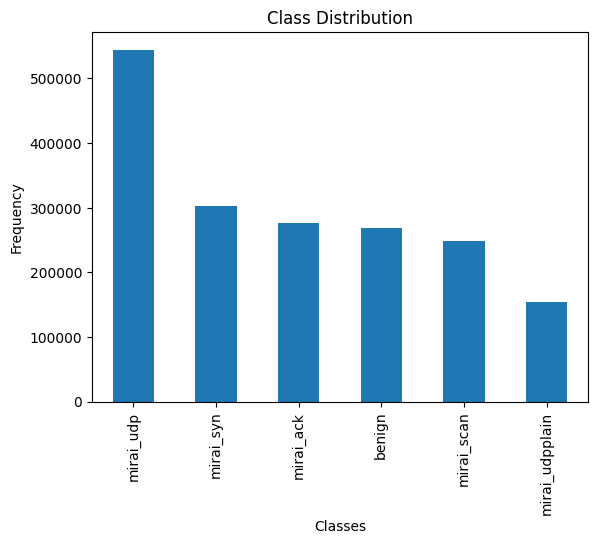

In [47]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
bar_plot = selected_mirai_dataset['label'].value_counts().plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Frequency')

# Set the y-axis tick formatter to include commas
bar_plot.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Annotate each bar with its percentage value
for i, val in enumerate(class_counts):
    plt.text(i, selected_mirai_dataset['label'].value_counts()[i], f'{val:.2f}%', ha='center')

plt.tight_layout()
plt.xticks(rotation=0)  
plt.show()

In [48]:
print(selected_mirai_dataset['label'].value_counts())

mirai_udp         544726
mirai_syn         302107
mirai_ack         276032
benign            268959
mirai_scan        248660
mirai_udpplain    153472
Name: label, dtype: int64


In [111]:
#from sklearn.model_selection import train_test_split
#y_sel = selected_mirai_dataset['label']
#X_sel = selected_mirai_dataset.drop(columns='label')

#X_train, X_test, y_train, y_test = train_test_split(X_sel, y_sel, test_size=0.2, random_state=42, stratify=y_sel)

In [49]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(selected_mirai_dataset, test_size=0.2, random_state=42, stratify=selected_mirai_dataset["label"])

In [50]:
features = list(train_df.columns)
features.remove("label")

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

In [52]:
X_train = train_df[features].values
y_train = train_df["label"].values

X_test = test_df[features].values
y_test = test_df["label"].values

In [137]:
pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.9 MB 180.8 kB/s eta 0:00:54
     ---------------------------------------- 0.1/9.9 MB 180.8 kB/s eta 0:00:54
     ---------------------------------------- 0.1/9.9 MB 1

In [139]:
pip install tabulate


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from tabulate import tabulate

In [54]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))

In [55]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.111666751871802,
 1: 1.083183516359108,
 2: 1.202414944100378,
 3: 0.9896931956886029,
 4: 0.548885793552266,
 5: 1.948182899216472}

In [56]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [57]:
input_shape

(25, 1)

In [59]:
from tensorflow.keras.utils import to_categorical

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

In [60]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [61]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]

    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)

    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]

    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

In [62]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [63]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

In [64]:
def create_clients(X, y, nb_classes, sampling_technique, num_clients=15, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

In [65]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [66]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
import keras
import os

In [67]:
import keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [68]:
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization, GRU, Dense, Dropout, Input

def get_model(input_shape, nb_classes):
    inputs = Input(shape=input_shape)
    
    # CNN layers
    x = Conv1D(8, 10, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = Conv1D(8, 10, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # GRU layers
    x = GRU(32, return_sequences=True)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling1D(data_format="channels_last")(x)
    
    # Dense layers
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(nb_classes, activation="softmax")(x)
    
    return keras.Model(inputs, outputs)

In [69]:
from keras.metrics import Recall, Precision
from tensorflow.keras.utils import plot_model

learning_rate = 1e-2
comms_round = 5
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 25, 8)             88        
                                                                 
 batch_normalization (BatchN  (None, 25, 8)            32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 25, 8)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 8)             648       
                                                                 
 batch_normalization_1 (Batc  (None, 25, 8)            32        
 hNormalization)                                             

In [70]:
BATCH_SIZE = 128
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=15, initial='client')

del X_train, y_train

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)
    client_set[client_name]["model"] = local_model

In [71]:
#process and batch the test set

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

del X_test, y_test

In [72]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

In [73]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [74]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [75]:
from sklearn.metrics import accuracy_score

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))

    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()

    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()

    f = f1_score(y_test, logits)
    f1 = f.numpy()

    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

In [76]:
def train_client(client, global_weights, class_weights):
    client_set[client]["model"] = client_set[client]["model"]

    #set local model weight to the weight of the global model
    client_set[client]["model"].set_weights(global_weights)

    #fit local model with client's data
    print(f"Round: {comm_round} | Client: {client} training")
    client_set[client]["model"].fit(client_set[client]["dataset"], epochs=5, verbose=1, class_weight=class_weights)

    #scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights

In [77]:
import random

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

for comm_round in range(comms_round):
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)

        scaled_local_weight_list.append(scaled_weights)

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)

    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.h5')
        print("New Weights Saved")

Round: 0 | Client: client_1 training
Epoch 1/5
748/748 [==============================] - 27s 19ms/step - loss: 0.4401 - accuracy: 0.7137 - recall: 0.6532 - precision: 0.7665 - f1_score: 0.7026
Epoch 2/5
748/748 [==============================] - 14s 18ms/step - loss: 0.3524 - accuracy: 0.7719 - recall: 0.7448 - precision: 0.8023 - f1_score: 0.7723
Epoch 3/5
748/748 [==============================] - 14s 18ms/step - loss: 0.3174 - accuracy: 0.8075 - recall: 0.7865 - precision: 0.8328 - f1_score: 0.8089
Epoch 4/5
748/748 [==============================] - 14s 18ms/step - loss: 0.2905 - accuracy: 0.8329 - recall: 0.8141 - precision: 0.8530 - f1_score: 0.8329
Epoch 5/5
748/748 [==============================] - 14s 18ms/step - loss: 0.2655 - accuracy: 0.8511 - recall: 0.8343 - precision: 0.8677 - f1_score: 0.8506
Round: 0 | Client: client_7 training
Epoch 1/5
748/748 [==============================] - 20s 20ms/step - loss: 0.4595 - accuracy: 0.6967 - recall: 0.7334 - precision: 0.8184 - f

In [78]:
global_model.load_weights("global_model_best_weights.h5")

In [79]:
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

11213/11213 [==============================] - 42s 4ms/step
comm_round: 4 | global_loss: 1.06736159324646 | global_accuracy: 0.99 | global_recall: 0.9891 | global_precision: 0.9909 | global_f1_score: 0.99 

loss :  1.0673616
accuracy :  0.9900471582421013
precision :  0.9908591
recall :  0.98913854
f1_score :  0.98999804


In [80]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

11213/11213 [==============================] - 39s 3ms/step


In [81]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [281]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(15,15))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [82]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

In [286]:
#ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))

Accuracy:  0.9900471582421013
Precision::  0.9900471582421013
Recall::  0.9900471582421013
F1_Score::  0.9900471582421014

Macro precision_recall_fscore_support (macro) average
(0.9866957015333333, 0.9906717175925096, 0.988641594245233, None)

Macro precision_recall_fscore_support (micro) average
(0.9900471582421013, 0.9900471582421013, 0.9900471582421014, None)

Macro precision_recall_fscore_support (weighted) average
(0.9901646651758349, 0.9900471582421013, 0.9900714182351626, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       0.99      1.00      1.00     53792
     mirai_ack       0.98      0.99      0.99     55207
    mirai_scan       0.99      1.00      1.00     49732
     mirai_syn       1.00      0.99      1.00     60422
     mirai_udp       1.00      0.98      0.99    108945
mirai_udpplain       0.96      0.98      0.97     30694

      accuracy                           0.99    358792
     macro avg     

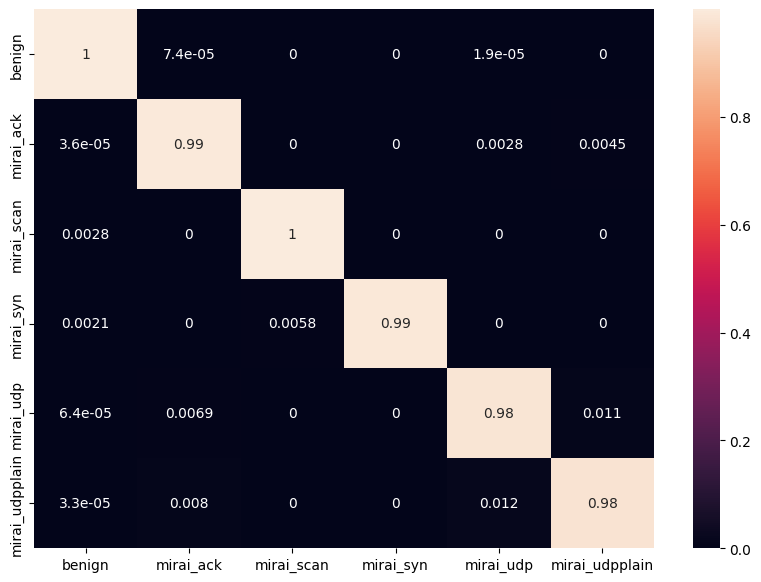

In [83]:
print_score(y_hat, y_true, label_encoder)

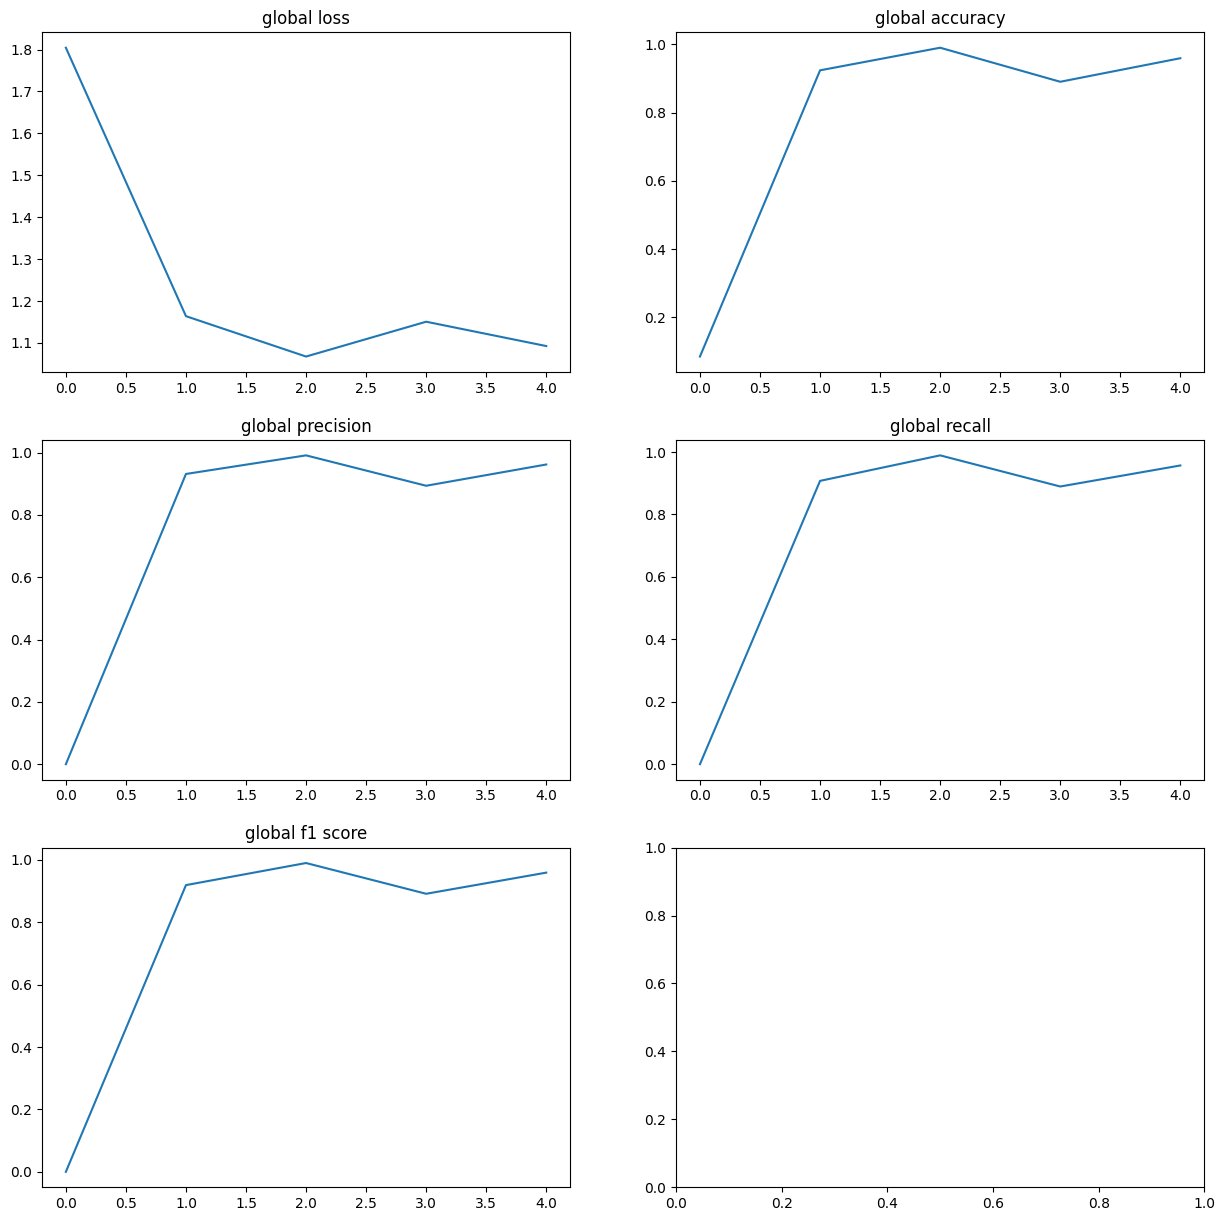

In [84]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))

axis[0, 0].plot(global_loss)
axis[0, 0].set_title("global loss")

axis[0, 1].plot(global_accuracy)
axis[0, 1].set_title("global accuracy")

axis[1, 0].plot(global_precision)
axis[1, 0].set_title("global precision")

axis[1, 1].plot(global_recall)
axis[1, 1].set_title("global recall")

axis[2, 0].plot(global_f1)
axis[2, 0].set_title("global f1 score")

plt.show()

In [288]:
pip install keras-flops


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from keras_flops import get_flops

In [86]:
# Calculae FLOPS
flops = get_flops(global_model, batch_size=1)

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


In [87]:
print(f"FLOPS: {flops / 10 ** 6:.03} M")  

FLOPS: 0.0402 M


In [88]:
global_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 25, 8)             88        
                                                                 
 batch_normalization (BatchN  (None, 25, 8)            32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 25, 8)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 8)             648       
                                                                 
 batch_normalization_1 (Batc  (None, 25, 8)            32        
 hNormalization)                                             

In [89]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average="macro")
    recall = recall_score(y_real, y_pred, average="macro")
    f1 = f1_score_rep(y_real, y_pred, average="macro")

    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision:: {:.4f}".format(precision))
    print("Recall:: {:.4f}".format(recall))
    print("F1_Score:: {:.4f}".format(f1))
    

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9900
Precision:: 0.9867
Recall:: 0.9907
F1_Score:: 0.9886

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       0.99      1.00      1.00     53792
     mirai_ack       0.98      0.99      0.99     55207
    mirai_scan       0.99      1.00      1.00     49732
     mirai_syn       1.00      0.99      1.00     60422
     mirai_udp       1.00      0.98      0.99    108945
mirai_udpplain       0.96      0.98      0.97     30694

      accuracy                           0.99    358792
     macro avg       0.99      0.99      0.99    358792
  weighted avg       0.99      0.99      0.99    358792



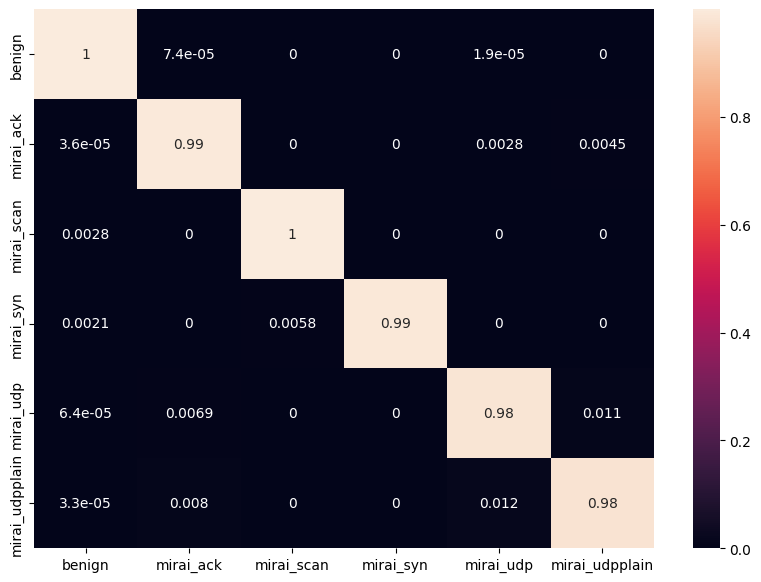

In [90]:
print_score(y_hat, y_true, label_encoder)

In [1]:
pip install tensorflow

     ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
      --------------------------------------- 10.2/413.4 kB ? eta -:--:--
      --------------------------------------- 10.2/413.4 kB ? eta -:--:--
      --------------------------------------- 10.2/413.4 kB ? eta -:--:--
     --- --------------------------------- 41.0/413.4 kB 196.9 kB/s eta 0:00:02
     --- --------------------------------- 41.0/413.4 kB 196.9 kB/s eta 0:00:02
     --- --------------------------------- 41.0/413.4 kB 196.9 kB/s eta 0:00:02
     ------ ------------------------------ 71.7/413.4 kB 231.8 kB/s eta 0:00:02
     -------- ---------------------------- 92.2/413.4 kB 238.1 kB/s eta 0:00:02
     -------- ---------------------------- 92.2/413.4 kB 238.1 kB/s eta 0:00:02
     -------- ---------------------------- 92.2/413.4 kB 238.1 kB/s eta 0:00:02


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from tensorflow.keras.utils import to_categorical

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

In [79]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [80]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]

    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)

    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]

    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

In [81]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [82]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

In [83]:
def create_clients(X, y, nb_classes, sampling_technique, num_clients=20, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

In [84]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [85]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os

In [86]:
import keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [87]:
def get_model(input_shape, nb_classes) -> tf.keras.Model:
    # Define MLP model
    input_data = tf.keras.layers.Input(shape=input_shape)
    mlp = tf.keras.layers.Dense(50)(input_data)
    mlp = tf.keras.layers.BatchNormalization()(mlp)
    mlp = tf.keras.layers.Activation('relu')(mlp)
    mlp = tf.keras.layers.Dropout(0.2)(mlp)

    mlp = tf.keras.layers.Dense(50)(mlp)
    mlp = tf.keras.layers.BatchNormalization()(mlp)
    mlp = tf.keras.layers.Activation('relu')(mlp)
    mlp = tf.keras.layers.Dropout(0.2)(mlp)

    mlp = tf.keras.layers.Dense(50)(mlp)
    mlp = tf.keras.layers.BatchNormalization()(mlp)
    mlp = tf.keras.layers.Activation('relu')(mlp)
    mlp = tf.keras.layers.Dropout(0.2)(mlp)

    mlp_output = tf.keras.layers.Dense(nb_classes, activation='softmax')(mlp)

    return tf.keras.Model(input_data, mlp_output)

In [246]:
from keras.metrics import Recall, Precision
from tensorflow.keras.utils import plot_model

learning_rate = 1e-2
comms_round = 5
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 25, 1)]           0         
                                                                 
 conv1d_310 (Conv1D)         (None, 25, 16)            176       
                                                                 
 batch_normalization_142 (Ba  (None, 25, 16)           64        
 tchNormalization)                                               
                                                                 
 conv1d_311 (Conv1D)         (None, 25, 16)            2576      
                                                                 
 batch_normalization_143 (Ba  (None, 25, 16)           64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_70 (MaxPoolin  (None, 12, 16)           0  

In [48]:
plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [295]:
import jupyter_core
print(jupyter_core.__version__)

5.7.2
